In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff

import plotly.graph_objects as go 
import plotly.io as pio 
import plotly.colors as colors

#to ignore warnings
import warnings
warnings.filterwarnings('ignore')
# plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-light.mplstyle')
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')

# Set the maximum number of columns to display
pd.options.display.max_columns = None
# Set the maximum number of rows to display
pd.options.display.max_rows = 10

plt.rc("figure", figsize=(22, 8))


## Load the Data


In [48]:
df = pd.read_csv('./Data/nearest-earth-objects(1910-2024).csv')

In [49]:
df.head()

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
0,2162117,162117 (1998 SD15),19.14,0.394962,0.883161,Earth,71745.401048,5.814362e+07,False
1,2349507,349507 (2008 QY),18.50,0.530341,1.185878,Earth,109949.757148,5.580105e+07,True
2,2455415,455415 (2003 GA),21.45,0.136319,0.304818,Earth,24865.506798,6.720689e+07,False
3,3132126,(2002 PB),20.63,0.198863,0.444672,Earth,78890.076805,3.039644e+07,False
4,3557844,(2011 DW),22.70,0.076658,0.171412,Earth,56036.519484,6.311863e+07,False


## Columns in the Dataset:
- neo_id: Unique identifier for each NEO.
- name: Name of the NEO.
- absolute_magnitude: Brightness of the NEO.
- estimated_diameter_min: Minimum estimated diameter of the NEO.
- estimated_diameter_max: Maximum estimated diameter of the NEO.
- orbiting_body: Celestial body the NEO orbits.
- relative_velocity: Velocity of the NEO relative to Earth.
- miss_distance: Distance at which the NEO will pass by Earth.
- is_hazardous: Boolean indicating if the NEO is considered hazardous.

In [50]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['name_encoded'] = label_encoder.fit_transform(df['name'])

# Compute correlation
correlation = np.corrcoef(df['name_encoded'], df['is_hazardous'])[0, 1]
print(f'Correlation: {correlation}')

Correlation: 0.1200575272800698


## Check The Data 🤔


In [51]:
df.shape

(338199, 10)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338199 entries, 0 to 338198
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   neo_id                  338199 non-null  int64  
 1   name                    338199 non-null  object 
 2   absolute_magnitude      338171 non-null  float64
 3   estimated_diameter_min  338171 non-null  float64
 4   estimated_diameter_max  338171 non-null  float64
 5   orbiting_body           338199 non-null  object 
 6   relative_velocity       338199 non-null  float64
 7   miss_distance           338199 non-null  float64
 8   is_hazardous            338199 non-null  bool   
 9   name_encoded            338199 non-null  int32  
dtypes: bool(1), float64(5), int32(1), int64(1), object(2)
memory usage: 22.3+ MB


In [53]:
# Check for missing values
df.isnull().sum()

neo_id                     0
name                       0
absolute_magnitude        28
estimated_diameter_min    28
estimated_diameter_max    28
orbiting_body              0
relative_velocity          0
miss_distance              0
is_hazardous               0
name_encoded               0
dtype: int64

In [54]:
# Drop rows with missing values
df.dropna(subset=['absolute_magnitude', 'estimated_diameter_min', 'estimated_diameter_max'], inplace=True)


In [55]:
df.isnull().sum()


neo_id                    0
name                      0
absolute_magnitude        0
estimated_diameter_min    0
estimated_diameter_max    0
orbiting_body             0
relative_velocity         0
miss_distance             0
is_hazardous              0
name_encoded              0
dtype: int64

In [56]:
df.duplicated().sum()

0

## Exploratory Data Anlaysis 🔍


In [57]:
# Summary statistics for numerical columns
df.describe()

,neo_id,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance,name_encoded
count,3.381710e+05,338171.000000,338171.000000,338171.000000,338171.000000,3.381710e+05,338171.000000
mean,1.760041e+07,22.932525,0.157812,0.352878,51060.017994,4.153547e+07,16763.518457
std,2.287276e+07,2.911216,0.313885,0.701869,26399.922830,2.077411e+07,10322.532279
min,2.000433e+06,9.250000,0.000511,0.001143,203.346433,6.745533e+03,0.000000
25%,3.373980e+06,20.740000,0.025384,0.056760,30710.626399,2.494495e+07,7847.000000
50%,3.742127e+06,22.800000,0.073207,0.163697,47557.046397,4.332724e+07,15601.000000
75%,5.405374e+07,25.100000,0.189041,0.422708,66673.223798,5.933961e+07,26320.000000
max,5.446281e+07,33.580000,37.545248,83.953727,291781.106613,7.479865e+07,33513.000000


### What is the distribution of hazardous vs. non-hazardous NEOs?


In [58]:
df.is_hazardous.value_counts()

False    295009
True      43162
Name: is_hazardous, dtype: int64

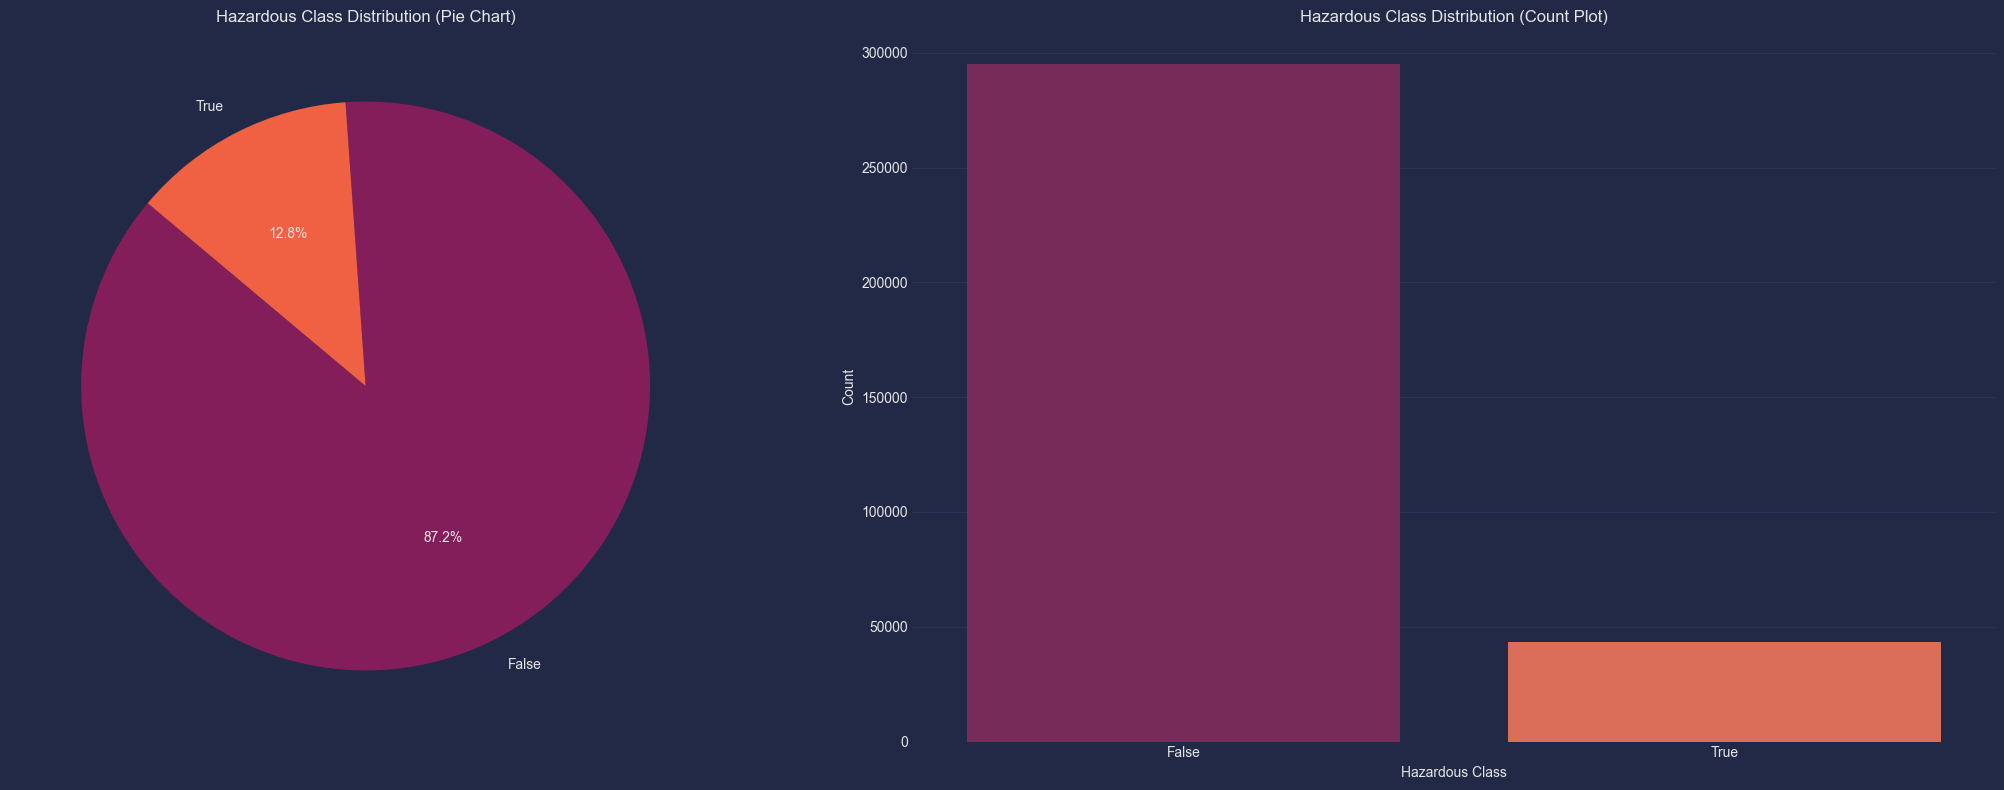

In [59]:


hazardous_counts = df['is_hazardous'].value_counts().sort_index()

palette = sns.color_palette("rocket", n_colors=len(hazardous_counts))

fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.pie(hazardous_counts, labels=hazardous_counts.index, autopct='%1.1f%%', startangle=140, colors=palette)
ax1.set_title('Hazardous Class Distribution (Pie Chart)')

sns.countplot(x='is_hazardous', data=df, ax=ax2, palette=palette)
ax2.set_title('Hazardous Class Distribution (Count Plot)')
ax2.set_xlabel('Hazardous Class')
ax2.set_ylabel('Count')

plt.tight_layout()
plt.show()


### What is the distribution of key continuous features (absolute_magnitude, miss_distance, relative_velocity)?


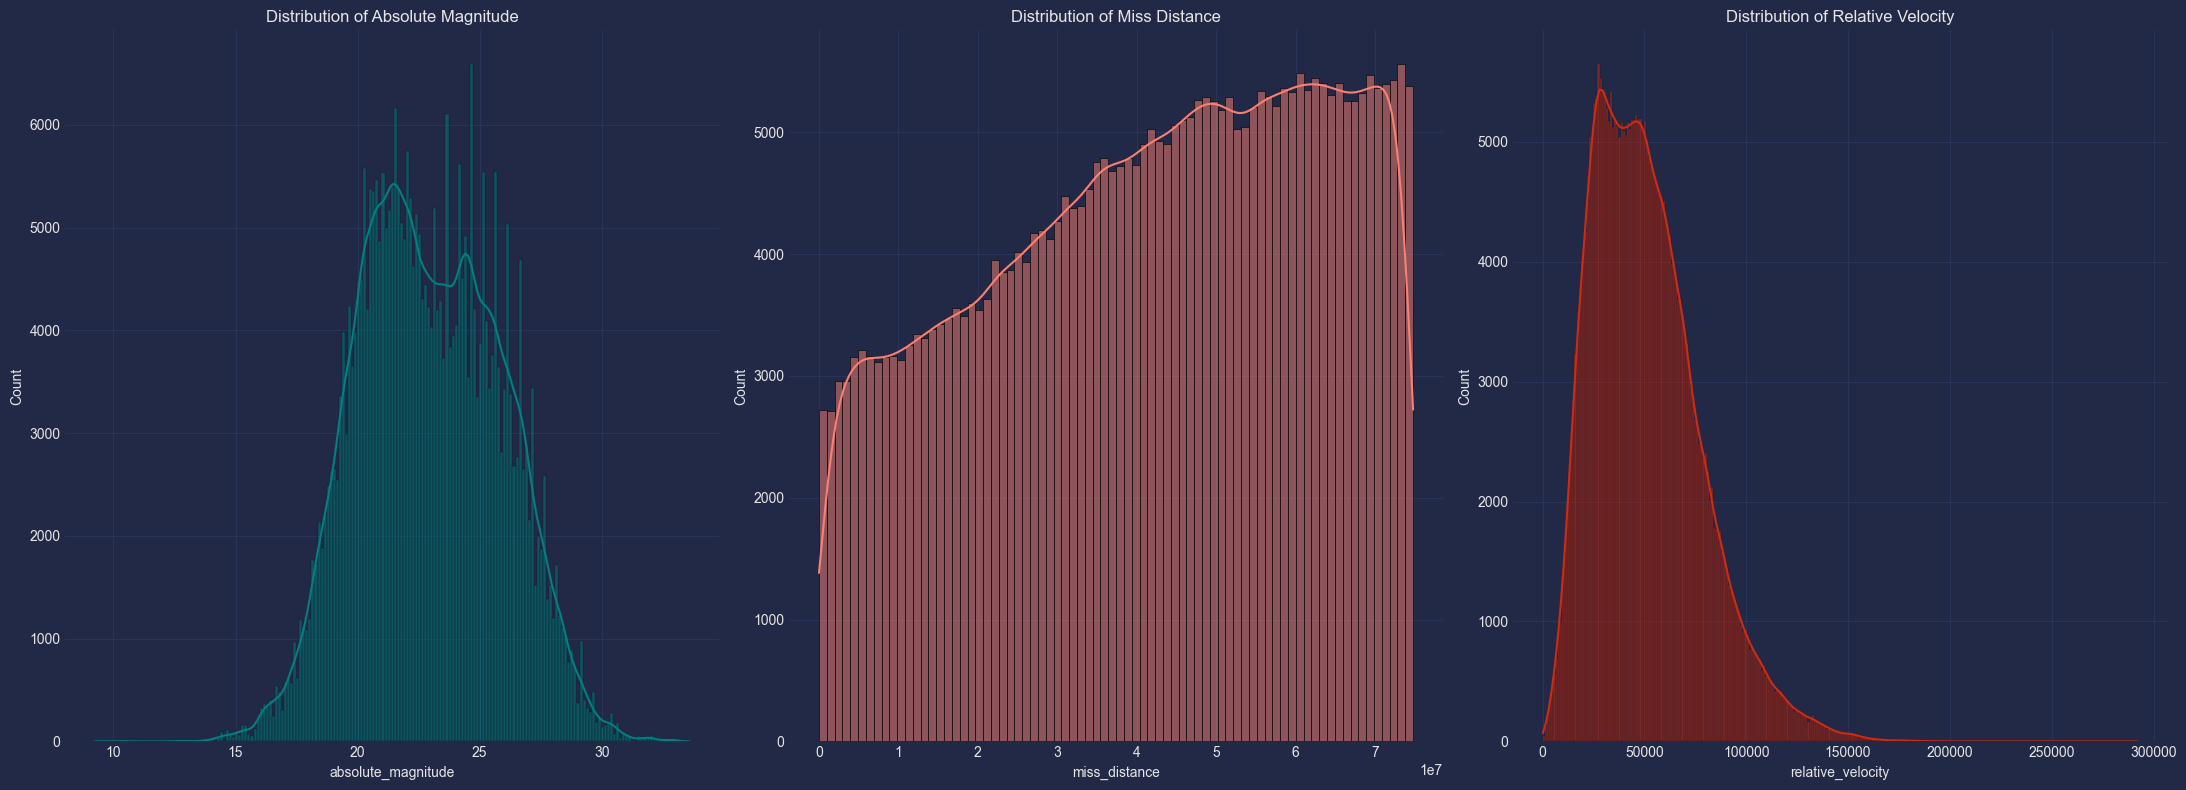

In [60]:
fig, ax = plt.subplots(1, 3)
sns.histplot(df['absolute_magnitude'], kde=True, ax=ax[0], color='teal')
sns.histplot(df['miss_distance'], kde=True, ax=ax[1], color='salmon')
sns.histplot(df['relative_velocity'], kde=True, ax=ax[2], color='#cf2a1245')
ax[0].set_title('Distribution of Absolute Magnitude')
ax[1].set_title('Distribution of Miss Distance')
ax[2].set_title('Distribution of Relative Velocity')
plt.tight_layout()
plt.show()


### Are certain features correlated?


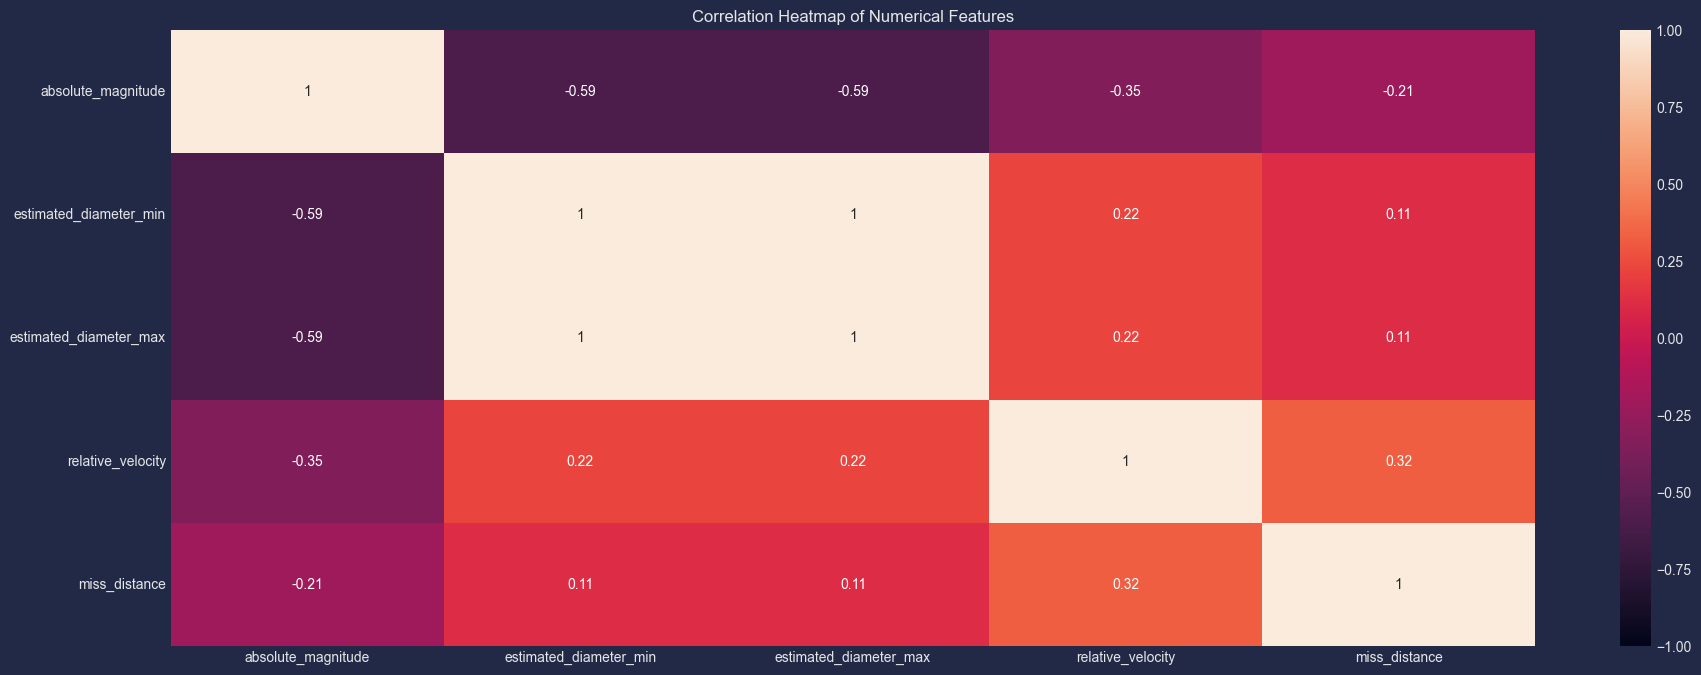

In [61]:
corr = df[['absolute_magnitude', 'estimated_diameter_min', 'estimated_diameter_max', 'relative_velocity', 'miss_distance']].corr()
sns.heatmap(corr, annot=True, cmap='rocket', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


### Do hazardous NEOs have distinct properties compared to non-hazardous ones?


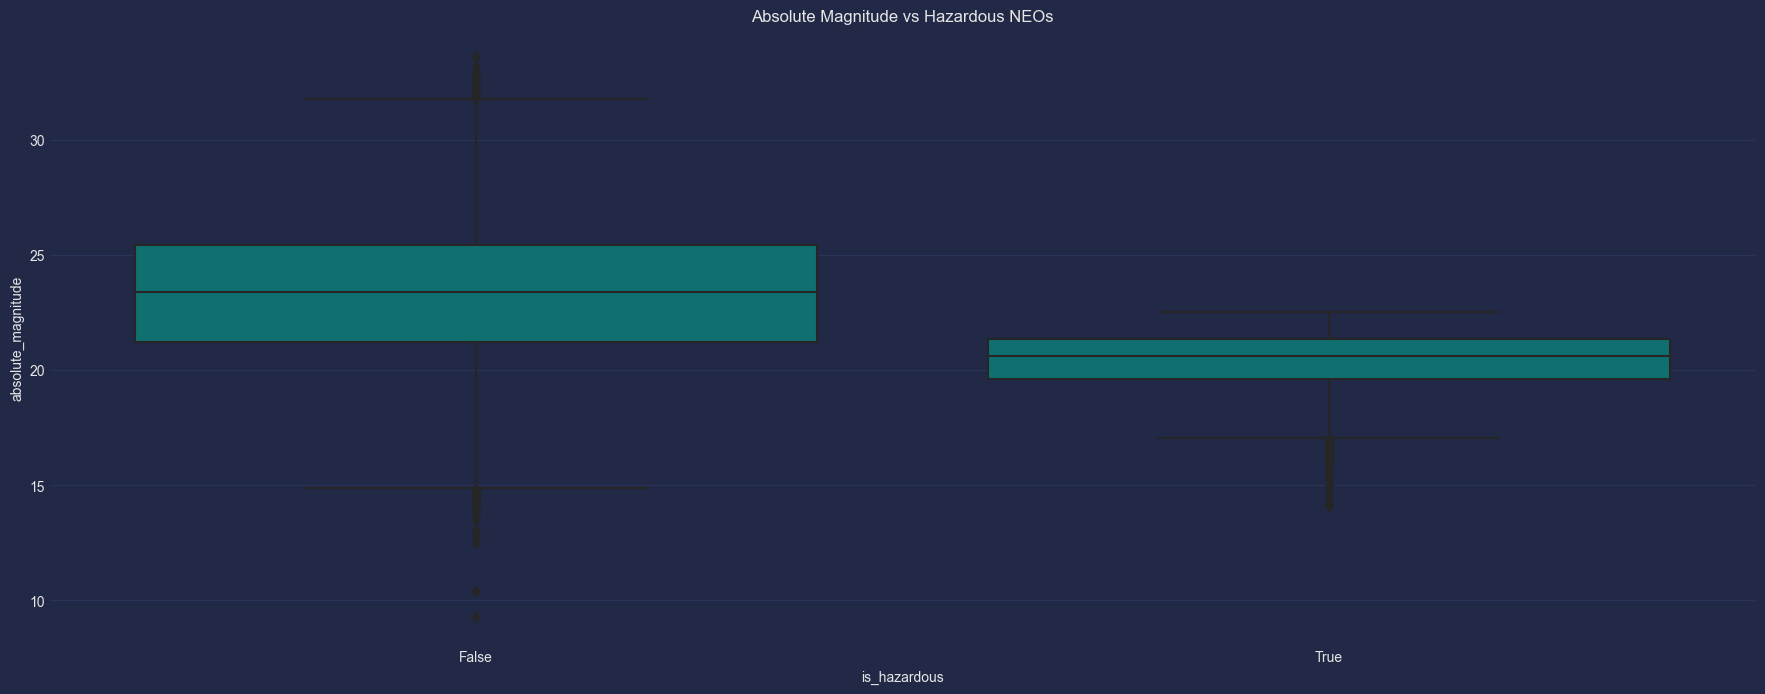

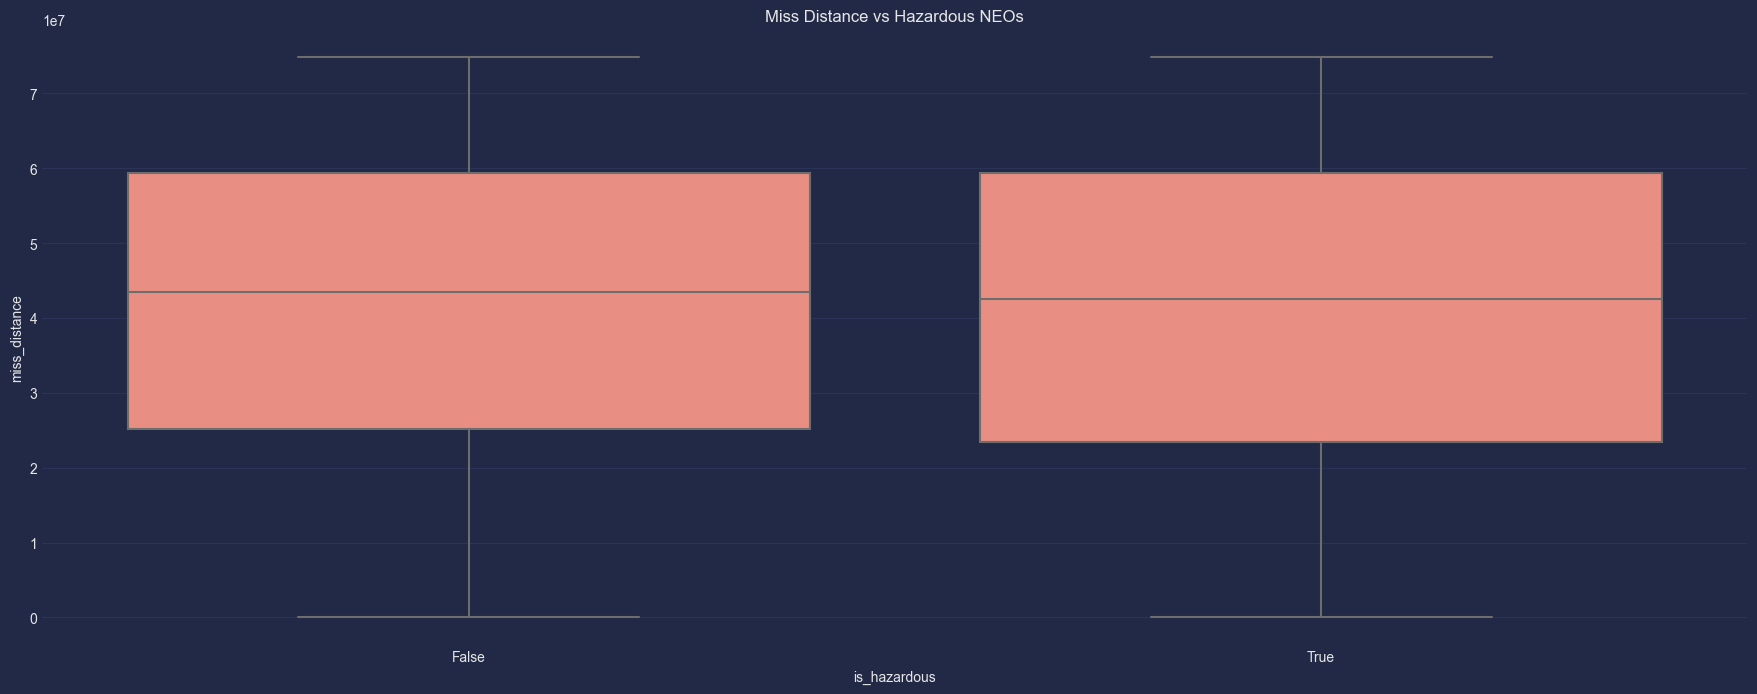

In [62]:
sns.boxplot(x='is_hazardous', y='absolute_magnitude', data=df,color='teal')
plt.title('Absolute Magnitude vs Hazardous NEOs')
plt.show()

sns.boxplot(x='is_hazardous', y='miss_distance', data=df,color='salmon')
plt.title('Miss Distance vs Hazardous NEOs')
plt.show()


### What is the relationship between relative_velocity and miss_distance?


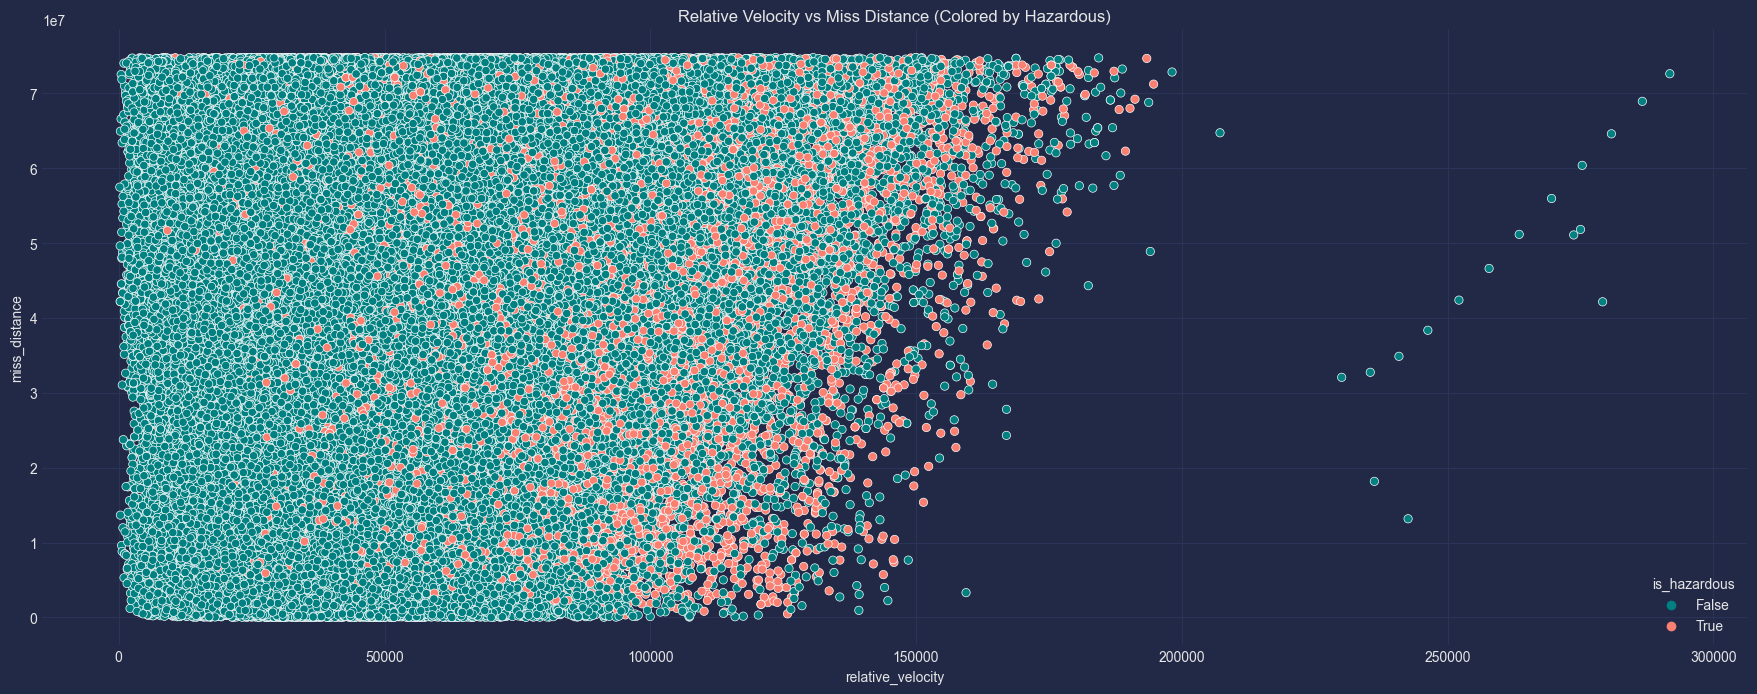

In [63]:
# Custom palette using a list of colors
sns.scatterplot(x='relative_velocity', y='miss_distance', hue='is_hazardous', data=df, palette=['teal', 'salmon']) 
plt.title('Relative Velocity vs Miss Distance (Colored by Hazardous)')
plt.show()


## Outliers Treatment

In [64]:
def remove_outliers(df, feature):
    # Compute the first and third quartiles
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    
    # Compute the Interquartile Range (IQR)
    iqr = q3 - q1

    upper_limit = q3 + 1.5 * iqr
    lower_limit = q1 - 1.5 * iqr

    # Filter out the outliers from the DataFrame
    filtered_df = df[(df[feature] >= lower_limit) & (df[feature] <= upper_limit)]
    
    return filtered_df


In [65]:
features_list = ["absolute_magnitude", "estimated_diameter_min", "estimated_diameter_max", "relative_velocity"]

# Apply outlier removal for each feature


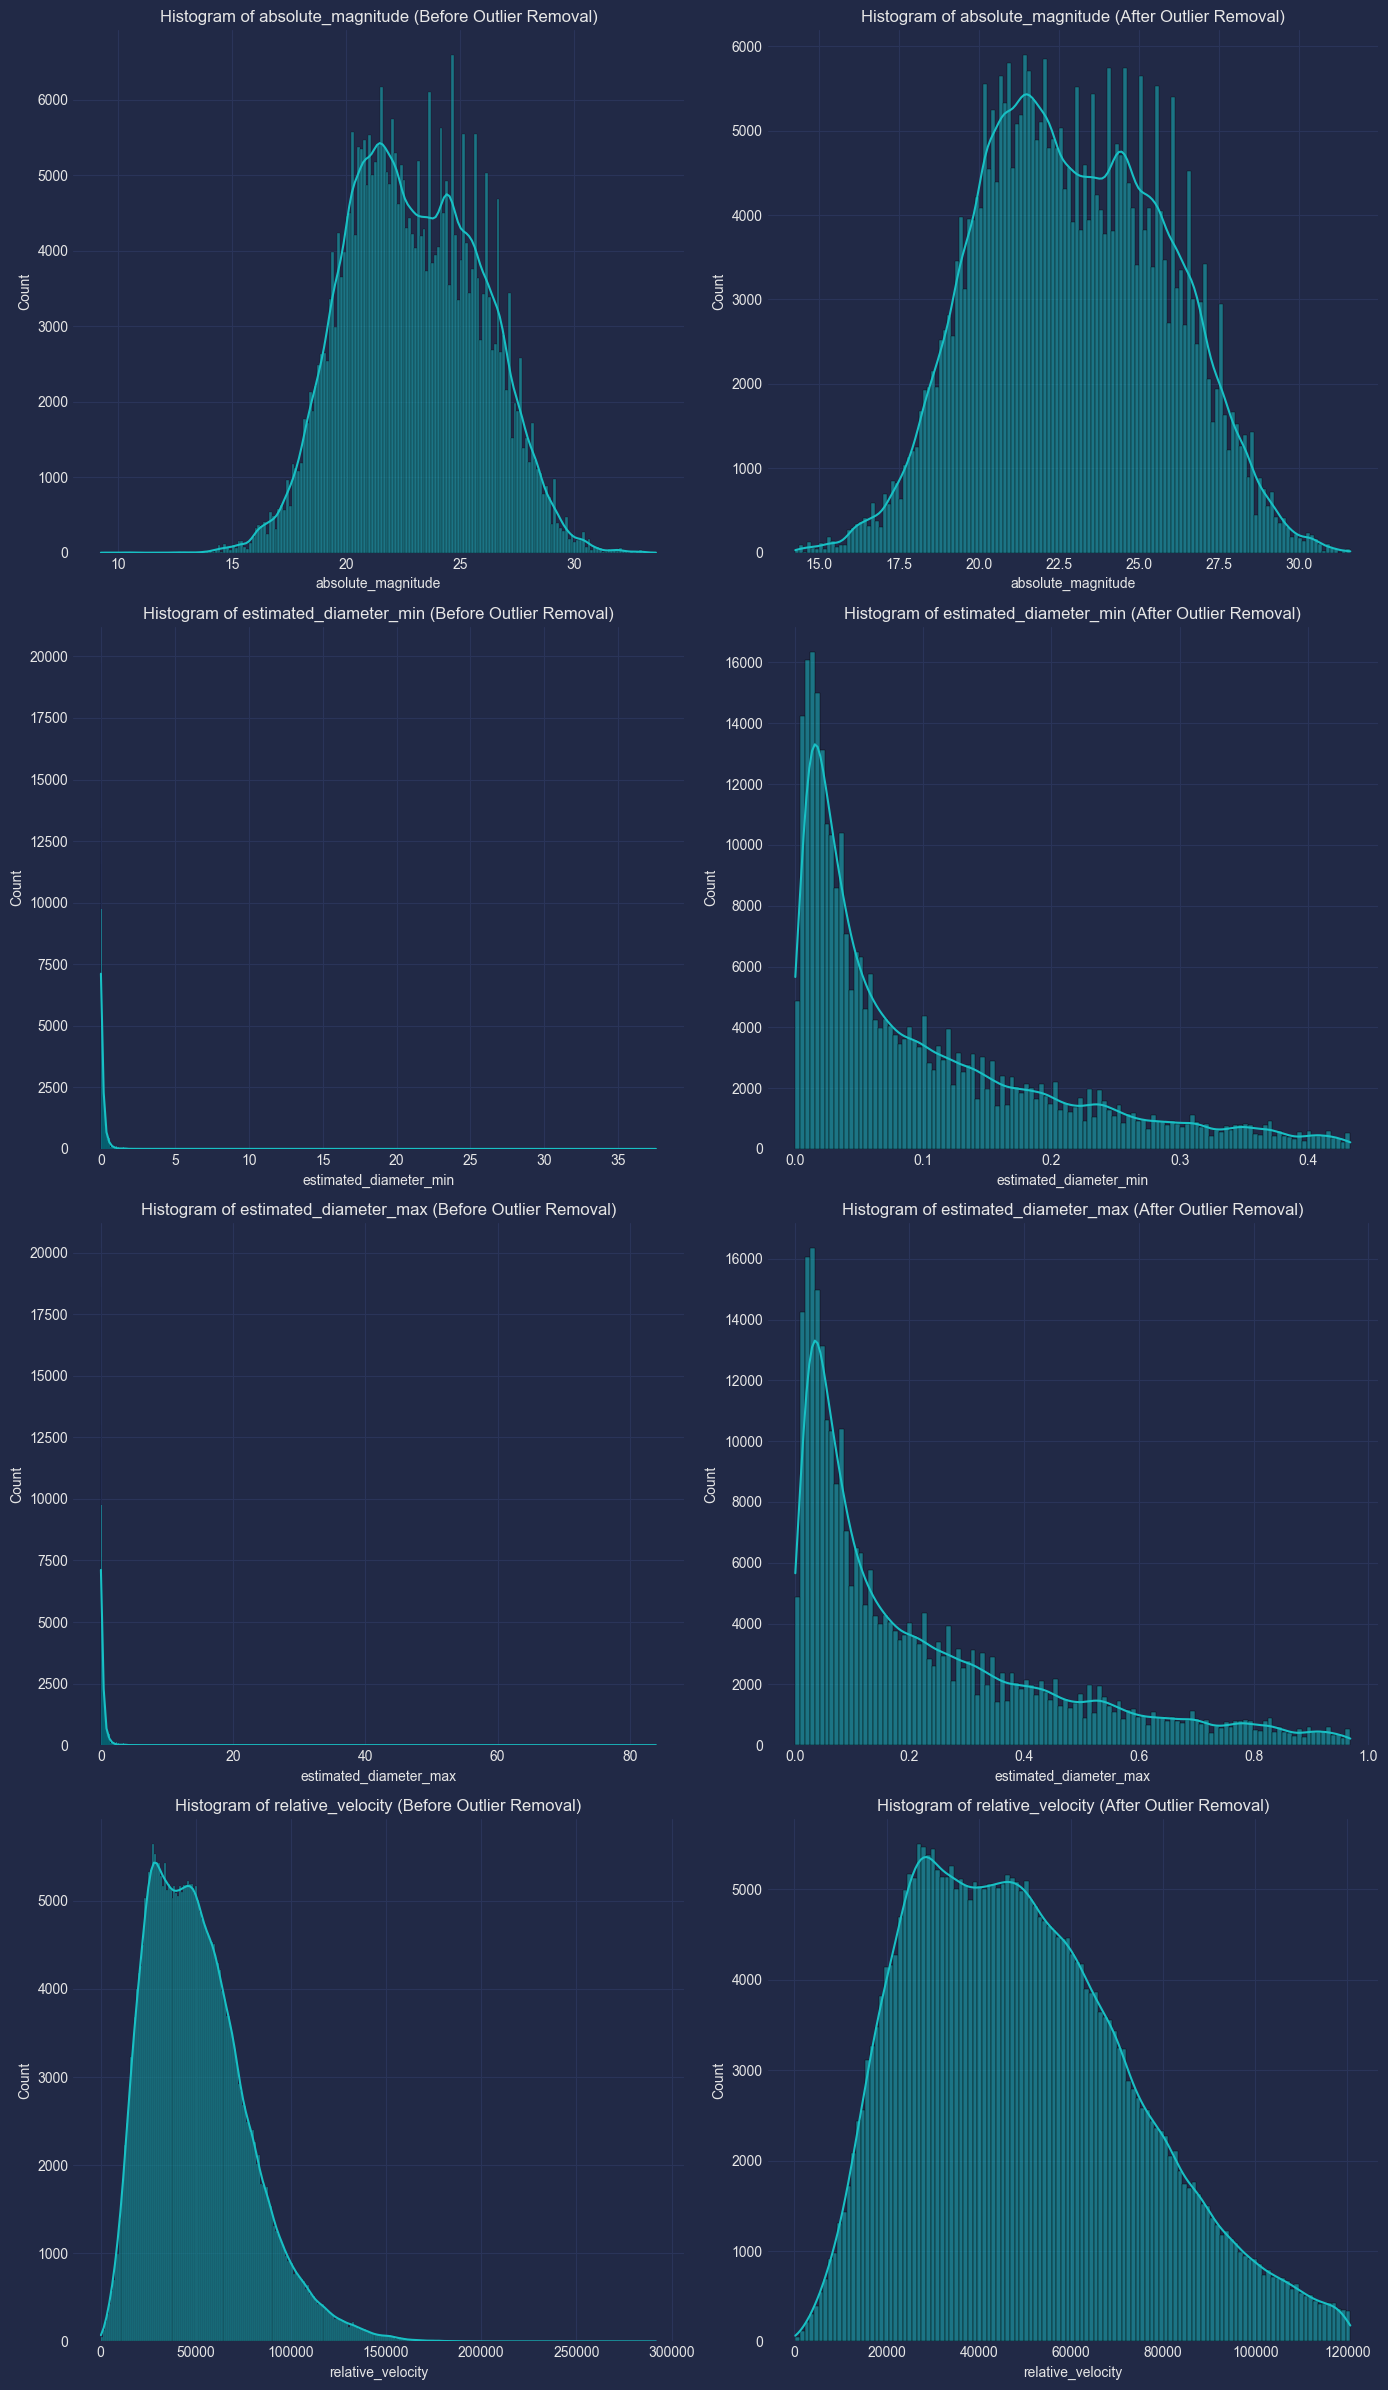

In [66]:
def plot_histograms(df, features_list):
    fig, axes = plt.subplots(len(features_list), 2, figsize=(14, 6 * len(features_list)))
    
    for i, feature in enumerate(features_list):
        # Plot histogram before outlier removal
        sns.histplot(df[feature], ax=axes[i, 0], kde=True)
        axes[i, 0].set_title(f'Histogram of {feature} (Before Outlier Removal)')
        
        # Plot histogram after outlier removal
        filtered_df = remove_outliers(df, feature)  # Filter the DataFrame
        sns.histplot(filtered_df[feature], ax=axes[i, 1], kde=True)
        axes[i, 1].set_title(f'Histogram of {feature} (After Outlier Removal)')
    
    plt.tight_layout()
    plt.show()

# Plot histograms before and after outlier removal
plot_histograms(df, features_list)

In [67]:
for feature in features_list:
    df = remove_outliers(df, feature)